# Analisis del turismo en Ecuador a través de Airbnb
### Daniel Arroyo, Manuel Lecaro,  Alex Macas, Ester Melo

Importando las librerías necesarias para la lectura de los archivos y el procesamiento gráfico

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import os


Carga de datos de airbnb al dataframe databnb

# Aqui carga los datasets que usamos para el analisis Exploratorio

In [4]:
df1 = pd.read_csv('dataset.csv', error_bad_lines=False) 
databnb = df1
databnb

,owner_id,title,location,price/guests,total_price/USD,cleaning_fee,service_fee,only_price,reviews,superhost,...,nextmonth_bookings,date,datetime,accuracy,communication,cleanliness,locationq,checkin,value,url
0,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6,0,...,NaN,2019-07-15,2019-07-15 18:29:10,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...
1,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,Hosted by Alejandro,0,...,NaN,2019-07-15,2019-07-15 18:29:21,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...
2,29500212,1 Cama: Casa con Piscina y Campo cerca de ciudad.,Santa Rosa,0,0,0,0,15,Hosted by Ernesto Rafael,0,...,NaN,2019-07-15,2019-07-15 18:29:35,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/29500212?location...
3,30006552,2 Camas: Casa con Piscina y Campo cerca de ciu...,Santa Rosa,0,0,0,0,14,1,0,...,NaN,2019-07-15,2019-07-15 18:29:51,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/30006552?location...
4,8192248,Casa de campo en un bosque de frutas,Torata,0,0,0,0,17,2,0,...,NaN,2019-07-15,2019-07-15 18:30:08,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/8192248?location=...
5,23627632,Habitaciones cómodas y Privadas,Santa Rosa,0,0,0,0,23,Hosted by Gina,0,...,NaN,2019-07-15,2019-07-15 18:30:22,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/23627632?location...
6,119665,DEPARTAMENTO PARA GRUPOS O PAREJAS,Cantón Huaquillas,0,0,0,0,25,Hosted by Katherine,0,...,NaN,2019-07-15,2019-07-15 18:30:39,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/119665?location=A...
7,31946370,VALLEJO HOTEL,Cantón Huaquillas,0,0,0,0,20,1,0,...,NaN,2019-07-15,2019-07-15 18:30:52,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31946370?location...
8,32743229,Hotel Cómodo y seguro cerca de la frontera Ecu...,Zarumilla,0,0,0,0,18,1,0,...,NaN,2019-07-15,2019-07-15 18:31:06,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/32743229?location...
9,26035837,Casa Estrella Santa Rosa,Santa Rosa,0,0,0,0,60,9,0,...,NaN,2019-07-15,2019-07-15 18:31:20,4.5,5.0,4.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/26035837?location...


In [5]:
groupZones = databnb["location"].value_counts()
groupZones.head()

Cuenca       929
Guayaquil    900
Loja         434
Salinas      388
Manta        380
Name: location, dtype: int64

## Sectorización
___
En esta sección se dividen los alojaminetos por su precio, diferenciando tres grandes grupos: economico (precio < 100), medio(precio entre 100 y 500), y caro (precio > 500)

In [13]:
economico=databnb.loc[databnb['only_price']<100]
medio=databnb.loc[(databnb['only_price']>100) & (databnb['only_price']<500)]
caro=databnb.loc[databnb['only_price']>500]

In [14]:
valor_economico=economico['location'].value_counts()
valor_economico.head()

Cuenca       911
Guayaquil    891
Loja         418
Manta        340
Salinas      338
Name: location, dtype: int64

In [15]:
valor_medio=medio['location'].value_counts()
valor_medio.head()

Tonsupa              117
Bahía de Caráquez     51
Puerto Ayora          39
General Villamil      36
Bahia de Caraquez     35
Name: location, dtype: int64

In [16]:
valor_caro=caro['location'].value_counts()
valor_caro

Machala            4
Malacatos          4
Puerto Ayora       3
Quito              3
Naranjito          2
San Cristobal      1
Playas             1
Loja               1
Girón              1
Puerto Villamil    1
Name: location, dtype: int64

## Visualizaciones
___
Visualizaciones de ananalisis univariado y multivariado.

In [18]:
dataCiudad=databnb[['location','only_price']].groupby(['location']).mean()
dataCiudad.head()

,only_price
location,
3 dormitorios en Cuenca,0.000000
Casa tipo cabaña americana en la Amazonia,10.000000
GREAT LOCATION BREAKFAST & BED,0.000000
Napo,79.666667
Nueva Loja,25.000000


### Preparación del dataset de cantones por provincia
Este dataset es necesaria para agregar la columna region al dataset de airbnb, con el objetivo de agrupar por provincia algunas variables

In [19]:
provCantonesDf = pd.read_csv("./cantonesecuador/cantonesPorProvincia.csv", encoding="utf-8")
provCantonesDf["Provincia"] = provCantonesDf["Provincia"].str.title()
provCantonesDf["Cantón"] = provCantonesDf["Cantón"].str.title()
provCantonesDf["Región"] = provCantonesDf["Región"].str.title()

provCantonesDf["Provincia"].drop_duplicates()

0                               Azuay
15                            Bolivar
22                              Cañar
29                             Carchi
35                           Cotopaxi
42                         Chimborazo
52                             El Oro
66                         Esmeraldas
74                             Guayas
99                           Imbabura
105                              Loja
121                          Los Rios
134                            Manabi
154                   Morona Santiago
166                              Napo
171                           Pastaza
175                         Pichincha
183                        Tungurahua
192                  Zamora Chinchipe
201                         Galapagos
204                         Sucumbios
211                          Orellana
215    Santo Domingo De Los Tsachilas
216                       Santa Elena
219              Zonas No Delimitadas
Name: Provincia, dtype: object

El siguiente dataframe databnbWRegions contiene todos los datos extraidos de airbnb con su region y provincia

In [20]:
databnbWRegions = databnb.merge(provCantonesDf, left_on="location", right_on="Cantón")
databnbWRegions

,owner_id,title,location,price/guests,total_price/USD,cleaning_fee,service_fee,only_price,reviews,superhost,...,accuracy,communication,cleanliness,locationq,checkin,value,url,Región,Provincia,Cantón
0,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6,0,...,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...,Costa,El Oro,Arenillas
1,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,Hosted by Alejandro,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...,Costa,El Oro,Arenillas
2,31317365,Hermosa casa de campo y paseos a caballo.,Arenillas,0,0,0,0,100,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31317365?location...,Costa,El Oro,Arenillas
3,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6,0,...,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...,Costa,El Oro,Arenillas
4,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,Hosted by Alejandro,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...,Costa,El Oro,Arenillas
5,31317365,Hermosa casa de campo y paseos a caballo.,Arenillas,0,0,0,0,100,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31317365?location...,Costa,El Oro,Arenillas
6,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6,0,...,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...,Costa,El Oro,Arenillas
7,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,Hosted by Alejandro,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...,Costa,El Oro,Arenillas
8,31317365,Hermosa casa de campo y paseos a caballo.,Arenillas,0,0,0,0,100,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31317365?location...,Costa,El Oro,Arenillas
9,29500212,1 Cama: Casa con Piscina y Campo cerca de ciudad.,Santa Rosa,0,0,0,0,15,Hosted by Ernesto Rafael,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/29500212?location...,Costa,El Oro,Santa Rosa


Pre procesado del dataset de Airbnb para eliminar los falsos reviews (ej. "Hosted by \*\*\*\*") provocados por errores con Selenium

In [21]:
databnbWRegions['reviews']=pd.to_numeric(databnbWRegions['reviews'],downcast='float',errors='coerce')
databnbWRegions

,owner_id,title,location,price/guests,total_price/USD,cleaning_fee,service_fee,only_price,reviews,superhost,...,accuracy,communication,cleanliness,locationq,checkin,value,url,Región,Provincia,Cantón
0,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6.0,0,...,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...,Costa,El Oro,Arenillas
1,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...,Costa,El Oro,Arenillas
2,31317365,Hermosa casa de campo y paseos a caballo.,Arenillas,0,0,0,0,100,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31317365?location...,Costa,El Oro,Arenillas
3,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6.0,0,...,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...,Costa,El Oro,Arenillas
4,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...,Costa,El Oro,Arenillas
5,31317365,Hermosa casa de campo y paseos a caballo.,Arenillas,0,0,0,0,100,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31317365?location...,Costa,El Oro,Arenillas
6,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,6.0,0,...,5,5.0,5.0,5.0,5.0,NaN,https://www.airbnb.com/rooms/31008582?location...,Costa,El Oro,Arenillas
7,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/33835983?location...,Costa,El Oro,Arenillas
8,31317365,Hermosa casa de campo y paseos a caballo.,Arenillas,0,0,0,0,100,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/31317365?location...,Costa,El Oro,Arenillas
9,29500212,1 Cama: Casa con Piscina y Campo cerca de ciudad.,Santa Rosa,0,0,0,0,15,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/29500212?location...,Costa,El Oro,Santa Rosa


In [23]:
alojamientosPorProvincia=databnbWRegions[['Región','Provincia','location']].groupby(['Región','Provincia']).count()
alojamientosPorProvincia

location
Región    Provincia                               
Costa     El Oro                               251
          Esmeraldas                           144
          Guayas                              1076
          Los Rios                             114
          Manabi                               657
          Santa Elena                          442
          Santo Domingo De Los Tsachilas       109
Galapagos Galapagos                             32
Oriente   Morona Santiago                        1
          Napo                                 255
          Pastaza                               13
          Sucumbios                              1
          Zamora Chinchipe                      53
Sierra    Azuay                                987
          Bolivar                               34
          Carchi                                16
          Cañar                                 24
          Chimborazo                            22
          Cotopaxi                             140
          Imbabura                             236
          Loja                                 449
          Pichincha                            347
          Tungurahua                            48

In [25]:
precioPorProvincia=databnbWRegions[['Región','Provincia','location','only_price']].groupby(['Región','Provincia']).mean()
precioPorProvincia

only_price
Región    Provincia                                 
Costa     El Oro                           54.800797
          Esmeraldas                       54.701389
          Guayas                           40.194238
          Los Rios                         33.070175
          Manabi                           48.745814
          Santa Elena                      52.755656
          Santo Domingo De Los Tsachilas   28.844037
Galapagos Galapagos                        64.875000
Oriente   Morona Santiago                  15.000000
          Napo                             28.050980
          Pastaza                          30.692308
          Sucumbios                        50.000000
          Zamora Chinchipe                 30.018868
Sierra    Azuay                            28.706180
          Bolivar                          29.500000
          Carchi                           21.062500
          Cañar                            37.125000
          Chimborazo                       67.863636
          Cotopaxi                         38.185714
          Imbabura                         33.055085
          Loja                             32.723831
          Pichincha                        56.181556
          Tungurahua                       51.541667

In [26]:
precioPorRegion = databnbWRegions[['Región','Provincia','location','only_price']].groupby(['Región']).mean()
precioPorRegion

,only_price
Región,
Costa,45.520587
Galapagos,64.875000
Oriente,28.507740
Sierra,35.547547


## Correlaciones
___
Para encontrar una correlación probaremos la hipótesis:
> El número de alojamientos por provincia depende de la densidad poblacional de la misma

In [27]:
datosProvincia = pd.read_csv("./poblacionprovincia/poblacionPorProvincia.csv", encoding="utf-8")
datosProvincia["densidad"] = datosProvincia["población"] / datosProvincia["superficie"]
datosProvincia

,provincia,población,superficie,hogaresInternet,densidad
0,Manabi,1537090,18939.60,24552,81.157469
1,Santa Elena,384102,3690.17,5524,104.087888
2,Esmeraldas,626626,16132.23,10503,38.843111
3,Guayas,4267893,15430.40,133641,276.589913
4,El Oro,698545,5766.68,19417,121.134691
5,Los Rios,899632,7205.27,10082,124.857500
6,Santo Domingo de los Tsachilas,44788,3446.65,8631,12.994647
7,Carchi,184136,3780.45,2333,48.707429
8,Imbabura,463957,4587.51,9738,101.134820
9,Pichincha,3116111,9539.91,190920,326.639455


Una vez cargado este dataset podemos hacer uso del merge para unir los datos de airbnb con la población por provincia

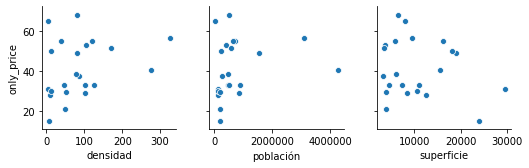

In [29]:
provinciaPrecioPobl = precioPorProvincia.merge(datosProvincia, left_on="Provincia", right_on="provincia")
sns.pairplot(provinciaPrecioPobl, x_vars=["densidad","población","superficie"], y_vars=["only_price"])

Podemos notar que con el precio promedio de los alojamientos no existe correlación alguna, ahora probaremos con el número total de alojamientos por provincia

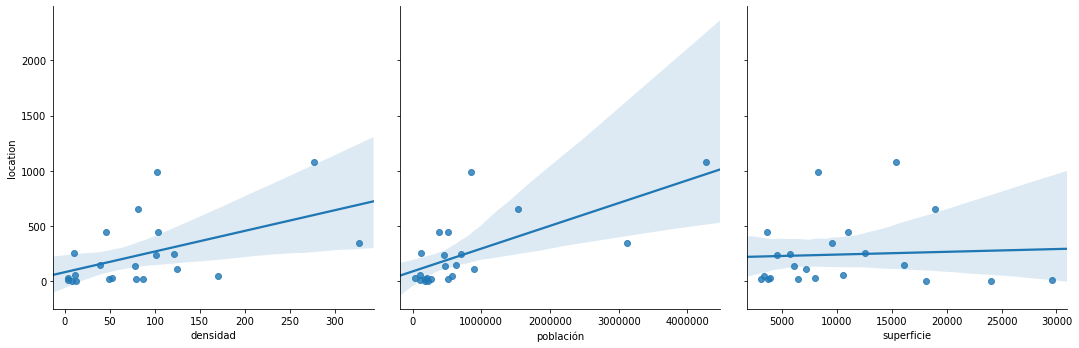

In [31]:
provinciaPrecioPobl = alojamientosPorProvincia.merge(datosProvincia, left_on="Provincia", right_on="provincia")
sns.pairplot(provinciaPrecioPobl, x_vars=["densidad","población","superficie"], y_vars=["location"], kind='reg', size=5)

Notamos que existe una relación creciente entre location (número de alojamientos de la provincia) y densidad (densidad poblacional de la provincia). Se puede hallar el índice de correlación exacto

In [32]:
provinciaPrecioPobl.corr()

,location,población,superficie,hogaresInternet,densidad
location,1.000000,0.683011,0.058294,0.494753,0.505603
población,0.683011,1.000000,0.098623,0.911785,0.862547
superficie,0.058294,0.098623,1.000000,0.049912,-0.266469
hogaresInternet,0.494753,0.911785,0.049912,1.000000,0.876878
densidad,0.505603,0.862547,-0.266469,0.876878,1.000000


El coeficiente de correlación entre densidad y número de alojamientos de la muestra es entonces **0.88**. Se puede observar también que hay correlación positiva entre población y densidad (lo que prueba que a mayor población mayor densidad poblacional) y una correlación negativa entre superficie y densidad (lo que prueba la relación decreciente entre ellas).

___
Otra correlacion interesante es la de la siguiente hipótesis:
> La popularidad de una provincia (basado en la popularidad de sus alojamientos) influye sobre el precio promedio de los alojamientos

Para esto se debe definir la métrica popularidad de un alojamiento, que será el número total de comentarios (reviews) que este posea en la plataforma de Airbnb. La popularidad de la provincia en Airbnb sería entonces la suma de los comentarios que tengan sus alojamientos.

Se debe eliminar las filas con reviews NaN, para esto se realiza primero un slicing del dataframe para obtener solo las columnas relevantes y luego se eliminan los NaN

In [33]:
databnbSliced=databnbWRegions[['title','location','reviews','Provincia']]
databnbSliced.head()

,title,location,reviews,Provincia
0,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,6.0,El Oro
1,Habitacion en Departamento Compartido,Arenillas,NaN,El Oro
2,Hermosa casa de campo y paseos a caballo.,Arenillas,1.0,El Oro
3,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,6.0,El Oro
4,Habitacion en Departamento Compartido,Arenillas,NaN,El Oro


In [34]:
databnbSliced.dropna(inplace=True)
databnbSliced.head()

/home/daniel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,location,reviews,Provincia
0,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,6.0,El Oro
2,Hermosa casa de campo y paseos a caballo.,Arenillas,1.0,El Oro
3,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,6.0,El Oro
5,Hermosa casa de campo y paseos a caballo.,Arenillas,1.0,El Oro
6,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,6.0,El Oro


In [35]:
comentariosPorProvincia=databnbSliced[['Provincia','reviews']].groupby(['Provincia']).sum()
comentariosPorProvincia

,reviews
Provincia,
Azuay,15296.0
Bolivar,31.0
Carchi,36.0
Cañar,28.0
Chimborazo,112.0
Cotopaxi,944.0
El Oro,368.0
Esmeraldas,734.0
Galapagos,478.0


# Metric: Popularity

In [39]:
comprecPorProvincia = precioPorProvincia.merge(comentariosPorProvincia, left_on="Provincia", right_on="Provincia")
comprecPorProvincia = comprecPorProvincia.rename(columns={'only_price': 'precio_promedio', 'reviews': 'popularidad'})
comprecPorProvincia

,precio_promedio,popularidad
Provincia,,
El Oro,54.800797,368.0
Esmeraldas,54.701389,734.0
Guayas,40.194238,31527.0
Los Rios,33.070175,64.0
Manabi,48.745814,4621.0
Santa Elena,52.755656,3996.0
Santo Domingo De Los Tsachilas,28.844037,82.0
Galapagos,64.875000,478.0
Napo,28.050980,857.0


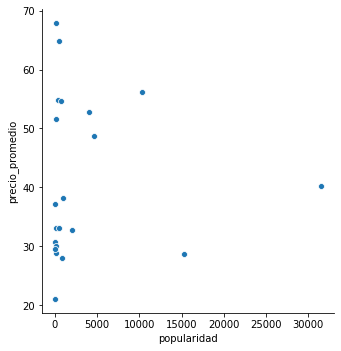

In [40]:
sns.pairplot(comprecPorProvincia, x_vars=["popularidad"], y_vars=["precio_promedio"], size=5)

In [41]:
comprecPorProvincia.corr()

,precio_promedio,popularidad
precio_promedio,1.000000,0.007091
popularidad,0.007091,1.000000


Se puede notar que el índice de correlación entre estas dos variables es muy bajo, por lo que se puede concluir que para esta muestra el precio_promedio de un alojamiento en una provincia no se ve afectado por la popularidad de la misma en Airbnb.

___
Podemos encontrar si el precio de un alojamiento se ve influenciado por el número de habitaciones que tiene. Un resultadop positivo podría indicar una correlación espúerea (puede que el efecto actual sea por otra variable):
> El número de habitaciones de un alojamiento tiene una correlación positiva con su precio

El proceso a seguir es el mismo que para las hipótesis anteriores.
Primero obtendremos el promedio de habitaciones de un alojamiento por provincia

In [42]:
prom_HabitacionesPorProvincia=databnbWRegions[['Provincia','bedrooms']].groupby(['Provincia']).mean()
prom_HabitacionesPorProvincia

,bedrooms
Provincia,
Azuay,4.057026
Bolivar,8.382353
Carchi,7.875000
Cañar,5.166667
Chimborazo,6.545455
Cotopaxi,5.371429
El Oro,3.394422
Esmeraldas,6.277778
Galapagos,3.843750


In [47]:
prom_HabitacionesPrecPorProvincia = prom_HabitacionesPorProvincia.merge(precioPorProvincia, left_on="Provincia", right_on="Provincia")
prom_HabitacionesPrecPorProvincia = prom_HabitacionesPrecPorProvincia.rename(columns={'bedrooms': 'promedio_habitaciones', 'only_price': 'precio_promedio'})
prom_HabitacionesPrecPorProvincia

,promedio_habitaciones,precio_promedio
Provincia,,
Azuay,4.057026,28.706180
Bolivar,8.382353,29.500000
Carchi,7.875000,21.062500
Cañar,5.166667,37.125000
Chimborazo,6.545455,67.863636
Cotopaxi,5.371429,38.185714
El Oro,3.394422,54.800797
Esmeraldas,6.277778,54.701389
Galapagos,3.843750,64.875000


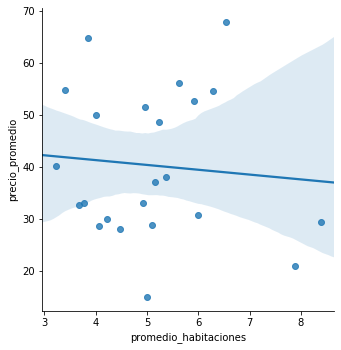

In [49]:
sns.pairplot(prom_HabitacionesPrecPorProvincia, x_vars=["promedio_habitaciones"], y_vars=["precio_promedio"], size=5, kind="reg")

[Text(0.5, 0, 'promedio_habitaciones'), Text(1.5, 0, 'precio_promedio')]

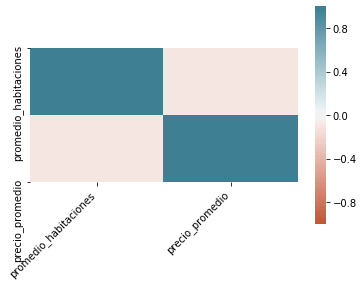

In [50]:
corr = prom_HabitacionesPrecPorProvincia.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Notamos que el índice no es lo suficientemente grande (<0.6) para concluir que hay una correlación positiva entre estas dos variables

In [51]:
df1 = pd.read_csv('PtoAyora.csv', error_bad_lines=False)
df2 = pd.read_csv('PtoBaquerizoMoreno.csv', error_bad_lines=False)
df3 = pd.read_csv('PuertoVillamil.csv', error_bad_lines=False)
df4 = pd.read_csv('datasetSierra.csv', error_bad_lines=False)
databnb = df4
databnb.head()

FileNotFoundError: [Errno 2] File b'PtoAyora.csv' does not exist: b'PtoAyora.csv'

In [52]:
from scipy import stats

In [53]:
databnb = databnb.fillna(0)
databnb['reviews'] = databnb.reviews.apply(lambda x : 0 if type(x)==str else x)
databnb.head()

,owner_id,title,location,price/guests,total_price/USD,cleaning_fee,service_fee,only_price,reviews,superhost,...,nextmonth_bookings,date,datetime,accuracy,communication,cleanliness,locationq,checkin,value,url
0,31008582,FINCA AGROECOLÓGICA HAPPY FRUIT,Arenillas,0,0,0,0,15,0,0,...,0.0,2019-07-15,2019-07-15 18:29:10,5,5.0,5.0,5.0,5.0,0.0,https://www.airbnb.com/rooms/31008582?location...
1,33835983,Habitacion en Departamento Compartido,Arenillas,0,0,0,0,11,0,0,...,0.0,2019-07-15,2019-07-15 18:29:21,0,0.0,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/33835983?location...
2,29500212,1 Cama: Casa con Piscina y Campo cerca de ciudad.,Santa Rosa,0,0,0,0,15,0,0,...,0.0,2019-07-15,2019-07-15 18:29:35,0,0.0,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/29500212?location...
3,30006552,2 Camas: Casa con Piscina y Campo cerca de ciu...,Santa Rosa,0,0,0,0,14,0,0,...,0.0,2019-07-15,2019-07-15 18:29:51,0,0.0,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/30006552?location...
4,8192248,Casa de campo en un bosque de frutas,Torata,0,0,0,0,17,0,0,...,0.0,2019-07-15,2019-07-15 18:30:08,0,0.0,0.0,0.0,0.0,0.0,https://www.airbnb.com/rooms/8192248?location=...


In [54]:
data_heat = databnb[['only_price','reviews','superhost','accuracy','communication', 'cleanliness','locationq','checkin','value']]

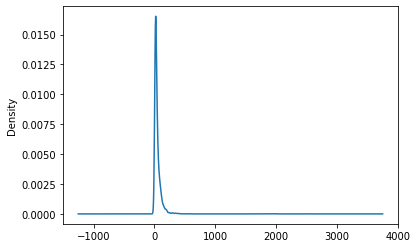

In [55]:
databnb['only_price'].plot.kde()

# Not Normalized Data Plotting

In [56]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k' )
boxplot = databnb.boxplot(column=['only_price'])

NameError: name 'figure' is not defined

KeyError: "['accuracy', 'superhost'] not in index"

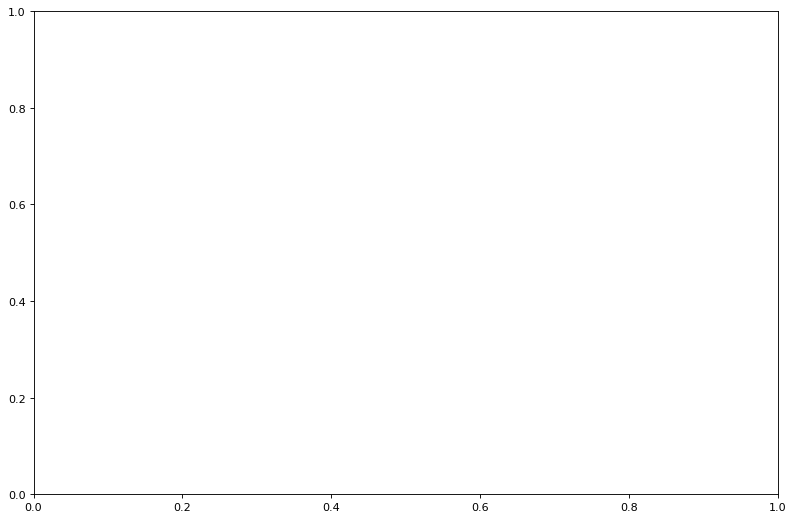

In [57]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k' )
boxplot = databnb.boxplot(column=['reviews','superhost','accuracy','communication', 'cleanliness','locationq','checkin','value'])


In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data_heat) 
data_heat.loc[:,:] = scaled_values
corr = data_heat.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ValueError: could not convert string to float: 'Anfitrión: María Ximena'

# Plotting distribution of variables

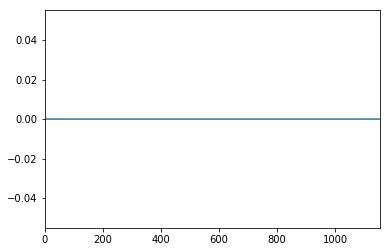

In [54]:
databnb['reviews'] = databnb['reviews'].apply(lambda x: 0 if type(x)==str else x) 
databnb['value'] = databnb['value'].apply(lambda x: 0 if type(x)==str else x) 

databnb['reviews'].plot()


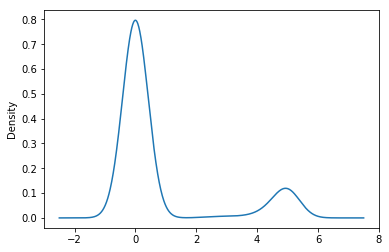

In [43]:
databnb['checkin'].plot.kde()

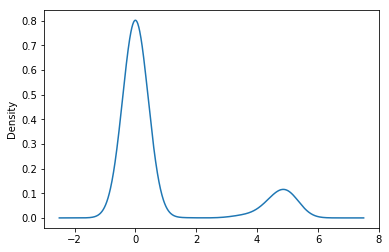

In [44]:
databnb['locationq'].plot.kde()

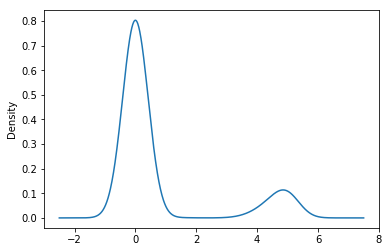

In [45]:
databnb['cleanliness'].plot.kde()

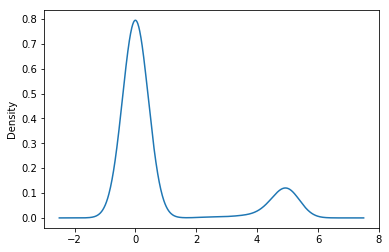

In [47]:
databnb['communication'].plot.kde()

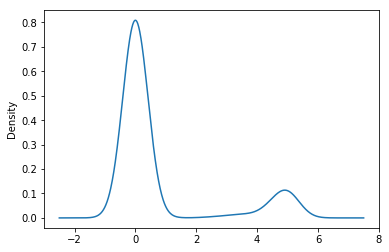

In [53]:
databnb['accuracy'].plot.kde()

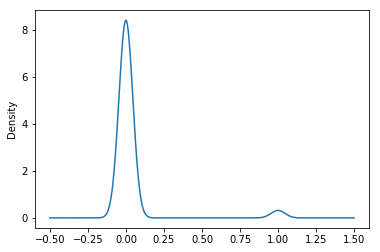

In [51]:
databnb['superhost'].plot.kde()

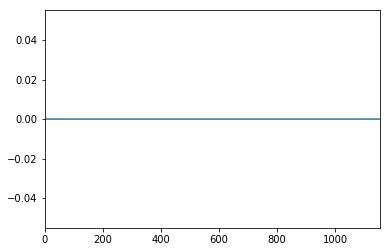

In [42]:
databnb['value'].plot()

# Distribution Fitting

Fitted alpha distribution with error=7.372652553330699e-06)
Fitted anglit distribution with error=0.0006062992125677612)
Fitted arcsine distribution with error=0.0005595111995421278)
Fitted argus distribution with error=0.0006457390650031744)
Fitted beta distribution with error=5.520368820060244e-05)
Fitted betaprime distribution with error=5.01758890653025e-06)
Fitted bradford distribution with error=0.0006097683594752817)
Fitted burr distribution with error=7.66439027204549e-06)
Fitted burr12 distribution with error=1.4282090740231982e-05)
Fitted cauchy distribution with error=2.0910542865349707e-05)
Fitted chi distribution with error=0.00019515835706962294)
Fitted chi2 distribution with error=0.00020871351227409737)
Fitted cosine distribution with error=0.0005926757733398515)
SKIPPED crystalball distribution (taking more than 30 seconds)
Fitted dgamma distribution with error=0.00011335932965595292)
Fitted dweibull distribution with error=0.00014164128781763216)
Fitted erlang distrib

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5726: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5726: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=0.0004319863986010861)
Fitted rdist distribution with error=0.00048181006984037187)
SKIPPED recipinvgauss distribution (taking more than 30 seconds)
Fitted reciprocal distribution with error=0.0006574080948730962)
Fitted rice distribution with error=0.0004319863581313037)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=0.0006158562780725946)
Fitted skewnorm distribution with error=0.0003859586648114541)
Fitted t distribution with error=3.606766903216792e-05)
Fitted trapz distribution with error=0.0006664147020463126)
SKIPPED triang distribution (taking more than 30 seconds)
Fitted truncexpon distribution with error=0.0006199360527926526)


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6348: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6348: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)


Fitted truncnorm distribution with error=0.0006574080948730962)


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6408: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


SKIPPED tukeylambda distribution (taking more than 30 seconds)
Fitted uniform distribution with error=0.0006399160393274242)
SKIPPED vonmises distribution (taking more than 30 seconds)
SKIPPED vonmises_line distribution (taking more than 30 seconds)
Fitted wald distribution with error=1.4997900205642568e-05)
Fitted weibull_max distribution with error=0.0006699368867584968)
SKIPPED weibull_min distribution (taking more than 30 seconds)


/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


Fitted wrapcauchy distribution with error=nan)


,sumsquare_error
fisk,0.000002
foldcauchy,0.000002
halfcauchy,0.000002
kappa3,0.000003
invgauss,0.000004


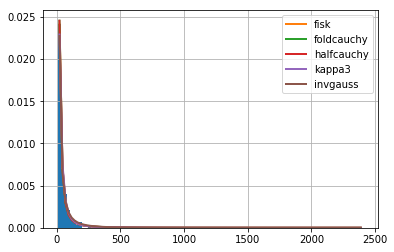

In [61]:
from fitter import Fitter
f = Fitter(databnb['only_price'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

# Movilization's Graph

In [62]:
dft1 = pd.read_csv('turistas1.csv', header=None,error_bad_lines=False)
dft2 = pd.read_csv('turistas2.csv', header=None,error_bad_lines=False)
dft3 = pd.read_csv('turistas3.csv', header=None,error_bad_lines=False)
dft4 = pd.read_csv('turistas4.csv', header=None,error_bad_lines=False)
dft5 = pd.read_csv('turistas5.csv', header=None,error_bad_lines=False)
datat = pd.concat([dft1, dft2, dft3,dft4,dft5])
datat.head()

,0,1,2
0,Alausi,Vive en Los Ángeles,California
1,Alausi,Vive en Washington,Distrito de Columbia
2,Alausi,Vive en Seattle,Washington
3,Alausi,Vive en Silver Spring,Maryland
4,Alausi,Vive en Ava,Nueva York


In [63]:
df3 = datat.groupby(datat[2]).count()
dftourist = df3
dftourist["From"] = dftourist.index
dftourist["weight"] = dftourist[0]
dftourist["To"] = "Ecuador"
dftourist.head()

,0,1,From,weight,To
2,,,,,
Alabama,2,2,Alabama,2,Ecuador
Alaska,2,2,Alaska,2,Ecuador
Alemania,29,29,Alemania,29,Ecuador
Argentina,27,27,Argentina,27,Ecuador
Arizona,8,8,Arizona,8,Ecuador


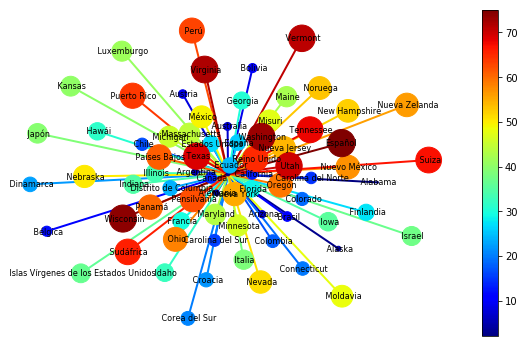

In [73]:
import networkx as nx
from pylab import rcParams

G = nx.from_pandas_edgelist(dftourist, "From", 'To', ['weight'])
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
node_colors = range(2, M + 3)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,cmap=plt.cm.jet)
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.jet, width=2)
nx.draw_networkx_labels(G,pos,dftourist["From"],font_size=8)
# set alpha value for each edge

#pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
#pc.set_array(edge_colors)
plt.colorbar(edges)
G.add_node('None')

#nx.draw_networkx_labels(G,pos,labels,font_size=4)
ax = plt.gca()
ax.set_axis_off()
rcParams['figure.figsize'] = 20,15 
plt.show()

# Insights